# Importing libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import re

# Load the dataset

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.shape

(75000, 4)

In [4]:
test.shape

(75000, 3)

In [5]:
train.head()

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


In [6]:
train.tail()

,sample_id,catalog_content,image_link,price
74995,41424,Item Name: ICE BREAKERS Spearmint Sugar Free M...,https://m.media-amazon.com/images/I/81p9PcPsff...,10.395
74996,35537,"Item Name: Davidson's Organics, Vanilla Essenc...",https://m.media-amazon.com/images/I/51DDKoa+mb...,35.920
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Ras...,https://m.media-amazon.com/images/I/91R2XCcpUf...,50.330
74998,188322,Item Name: Nescafe Dolce Gusto Capsules - CARA...,https://m.media-amazon.com/images/I/51W40YU98+...,15.275
74999,298504,Item Name: Pimenton de la Vera - Picante (2.47...,https://m.media-amazon.com/images/I/81dFnrP6C4...,28.240


In [7]:
test.head()

,sample_id,catalog_content,image_link
0,100179,Item Name: Rani 14-Spice Eshamaya's Mango Chut...,https://m.media-amazon.com/images/I/71hoAn78AW...
1,245611,Item Name: Natural MILK TEA Flavoring extract ...,https://m.media-amazon.com/images/I/61ex8NHCIj...
2,146263,Item Name: Honey Filled Hard Candy - Bulk Pack...,https://m.media-amazon.com/images/I/61KCM61J8e...
3,95658,Item Name: Vlasic Snack'mm's Kosher Dill 16 Oz...,https://m.media-amazon.com/images/I/51Ex6uOH7y...
4,36806,"Item Name: McCormick Culinary Vanilla Extract,...",https://m.media-amazon.com/images/I/71QYlrOMoS...


In [8]:
test.tail()

,sample_id,catalog_content,image_link
74995,93616,Item Name: Good Seasons Zezty Italian Salad Dr...,https://m.media-amazon.com/images/I/51e9H27lgv...
74996,249434,"Item Name: Colombina Swirled Love Tiger Pops, ...",https://m.media-amazon.com/images/I/61IpkExmVt...
74997,162217,"Item Name: Kerns, Guava Nectar, 11.5 Fl Oz Can...",https://m.media-amazon.com/images/I/A1NMggyCLz...
74998,230487,Item Name: NY SPICE SHOP Licorice Candy - 1 Po...,https://m.media-amazon.com/images/I/81P69kEP5q...
74999,279477,"Item Name: Rumford Baking Powder, 10-Ounces (P...",https://m.media-amazon.com/images/I/81AkqXU7Q5...


# Missing values

In [9]:
print(train.isnull().sum())

sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sample_id        75000 non-null  int64 
 1   catalog_content  75000 non-null  object
 2   image_link       75000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
train.describe()

,sample_id,price
count,75000.000000,75000.000000
mean,149841.917707,23.647654
std,86585.346513,33.376932
min,0.000000,0.130000
25%,73845.750000,6.795000
50%,150129.000000,14.000000
75%,225040.250000,28.625000
max,299438.000000,2796.000000


In [13]:
test.describe()

,sample_id
count,75000.000000
mean,149387.988880
std,86763.376732
min,1.000000
25%,73760.500000
50%,149109.500000
75%,224529.750000
max,299439.000000


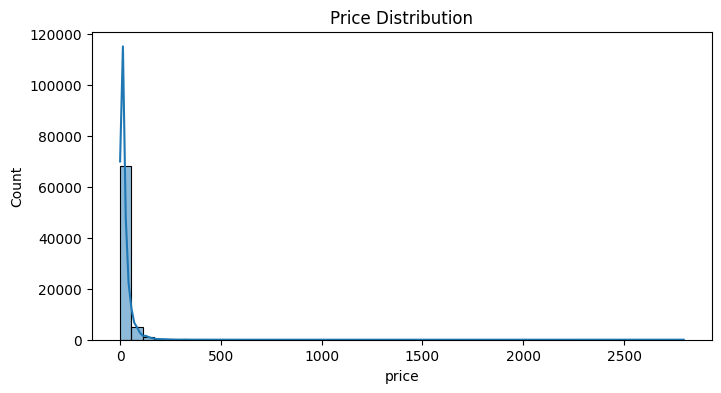

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(train['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

In [15]:
train['text_length'] = train['catalog_content'].astype(str).apply(len)
print("\nText Length Stats:\n", train['text_length'].describe())


Text Length Stats:
 count    75000.000000
mean       908.886547
std        852.896151
min         32.000000
25%        251.000000
50%        643.000000
75%       1280.000000
max       7894.000000
Name: text_length, dtype: float64


## Detect the outliers

In [16]:
Q1=train['price'].quantile(0.25)
Q3=train['price'].quantile(0.75)
IQR=Q3-Q1

In [17]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
outliers = train[(train['price'] < lower_bound) | (train['price'] > upper_bound)]
print(f"Number of outliers: {len(outliers)} out of {len(train)}")

Number of outliers: 5524 out of 75000


### Capping keeps extreme values but limits their influence. Log transform compresses large values and expands small ones → making price relationships smoother for ML/DL models.

In [19]:
train['price_capped'] = np.where(train['price'] > upper_bound, upper_bound,np.where(train['price'] < lower_bound, lower_bound, train['price']))

In [20]:
train['price_log'] = np.log1p(train['price_capped'])

In [21]:
train['is_outlier'] = (train['price'] > upper_bound).astype(int) #learn patterns specific to high-priced items.

In [22]:
train.head()

,sample_id,catalog_content,image_link,price,text_length,price_capped,price_log,is_outlier
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,91,4.89,1.773256,0
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,511,13.12,2.647592,0
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,328,1.97,1.088562,0
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,1318,30.34,3.444895,0
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,155,61.37,4.133084,1


## Checking for missing image links

In [23]:
missing_images = train['image_link'].isna().sum()
print(f"\nMissing image links: {missing_images}")


Missing image links: 0


# ADVANCE FEATURE ENGINEERING

In [24]:
# to clean the catalog content 
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)      
    text = re.sub(r'\s+', ' ', text).strip()       
    return text

train['clean_text']=train['catalog_content'].apply(clean_text)
test['clean_text']=test['catalog_content'].apply(clean_text)

In [25]:
def extract_brand(item_name):
    if pd.isna(item_name):
        return None

    cleaned = re.sub(r'(?i)^item\s*name\s*:\s*', '', str(item_name).strip())
    patterns = [
        r'^([A-Z][a-z]+(?:\s[A-Z][a-z]+){0,2})',        
        r'^([A-Z]{2,}(?:\s[A-Z]{2,})?)',               
        r'^([A-Z][a-zA-Z0-9&.\-]{1,15})',               
        r'^([a-z][a-zA-Z0-9&.\-]{1,15})',              
        r'^(\d+[A-Z]*[a-zA-Z0-9&.\-]*)'                
    ]
    for p in patterns:
        match = re.match(p, cleaned)
        if match:
            brand = match.group(1).strip()
            return brand

    tokens = cleaned.split()
    if not tokens:
        return None

    stop_words = {
        'green', 'red', 'blue', 'mild', 'soap', 'powder', 'milk', 'sauce', 'cream', 
        'drink', 'pack', 'butter', 'bottle', 'chips', 'snack', 'flavour', 'flavor'
    }
    brand_tokens = []
    for tok in tokens:
        if tok.lower() in stop_words:
            break
        brand_tokens.append(tok)
        if len(brand_tokens) >= 3:  # max 3 words
            break

    brand = " ".join(brand_tokens).strip() if brand_tokens else None

    if brand:
        brand = re.sub(r'\s+', ' ', brand)  # remove extra spaces
        if brand.isupper() or brand.islower():
            brand = brand.capitalize()
    return brand

train['brand'] = train['catalog_content'].apply(extract_brand)
test['brand']=test['catalog_content'].apply(extract_brand)
print("Null brand rows:", train['brand'].isna().sum())
print("Null brand rows:", test['brand'].isna().sum())

Null brand rows: 0
Null brand rows: 0


In [27]:
def extract_ipq_advanced_v2(text):
    text = str(text).lower()
    patterns = [
        r'pack\s*of\s*(\d+)',
        r'combo\s*of\s*(\d+)',
        r'set\s*of\s*(\d+)',
        r'(\d+)\s*[pP][cC][sS]',
        r'(\d+)\s*[uU]nits?',
        r'(\d+)\s*[bB]ottles?',
        r'(\d+)\s*[cC]ount',
        r'(\d+)\s*[pP]ack',
        r'(\d+)\s*[xX]\s*\d*',
    ]

    for p in patterns:
        match = re.search(p, text)
        if match:
            return int(match.group(1))

    if re.search(r'\b(twin|double)\s*pack\b', text):
        return 2

    if re.search(r'\b(single|one|each|solo)\b', text):
        return 1

    return np.nan

train['pack_quantity'] = train['catalog_content'].apply(extract_ipq_advanced_v2)
test['pack_quantity'] = test['catalog_content'].apply(extract_ipq_advanced_v2)

total_rows = len(train)
non_null_rows = train['pack_quantity'].notna().sum()
coverage = (non_null_rows / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Rows with detected pack_quantity (v3): {non_null_rows}")
print(f"Detection coverage: {coverage:.2f}%")

total_rows_test = len(test)
non_null_rows_test = test['pack_quantity'].notna().sum()
coverage_test = (non_null_rows_test / total_rows_test) * 100

print(f"Total rows: {total_rows_test}")
print(f"Rows with detected pack_quantity (v3): {non_null_rows_test}")
print(f"Detection coverage: {coverage_test:.2f}%")

Total rows: 75000
Rows with detected pack_quantity (v3): 74439
Detection coverage: 99.25%
Total rows: 75000
Rows with detected pack_quantity (v3): 74423
Detection coverage: 99.23%


In [28]:
train.head()

,sample_id,catalog_content,image_link,price,text_length,price_capped,price_log,is_outlier,clean_text,brand,pack_quantity
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,91,4.89,1.773256,0,item name la victoria green taco sauce mild 12...,La Victoria Green,6.0
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,511,13.12,2.647592,0,item name salerno cookies the original butter ...,Salerno Cookies,4.0
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,328,1.97,1.088562,0,item name bear creek hearty soup bowl creamy c...,Bear Creek Hearty,6.0
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,1318,30.34,3.444895,0,item name judee s blue cheese powder 11 25 oz ...,Judee,25.0
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,155,61.37,4.133084,1,item name kedem sherry cooking wine 12 7 ounce...,kedem,0.0


In [29]:
test.head()

,sample_id,catalog_content,image_link,clean_text,brand,pack_quantity
0,100179,Item Name: Rani 14-Spice Eshamaya's Mango Chut...,https://m.media-amazon.com/images/I/71hoAn78AW...,item name rani 14 spice eshamaya s mango chutn...,Rani,5.0
1,245611,Item Name: Natural MILK TEA Flavoring extract ...,https://m.media-amazon.com/images/I/61ex8NHCIj...,item name natural milk tea flavoring extract b...,Natural,1.0
2,146263,Item Name: Honey Filled Hard Candy - Bulk Pack...,https://m.media-amazon.com/images/I/61KCM61J8e...,item name honey filled hard candy bulk pack 2 ...,Honey Filled Hard,0.0
3,95658,Item Name: Vlasic Snack'mm's Kosher Dill 16 Oz...,https://m.media-amazon.com/images/I/51Ex6uOH7y...,item name vlasic snack mm s kosher dill 16 oz ...,Vlasic Snack,2.0
4,36806,"Item Name: McCormick Culinary Vanilla Extract,...",https://m.media-amazon.com/images/I/71QYlrOMoS...,item name mccormick culinary vanilla extract 3...,Mc,0.0


# Text Embeddings And Image Feature extraction

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
text_embeddings = model.encode(train['clean_text'].tolist(), batch_size=64, show_progress_bar=True)
test_text_embeddings = model.encode(test['clean_text'].tolist(), batch_size=64, show_progress_bar=True)

np.save('text_embeddings.npy', text_embeddings)
np.save('test_test_embeddings.npy', test_text_embeddings)

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
from tqdm import tqdm

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_model.eval() 
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def load_image(url):
    try:
        return Image.open(requests.get(url, stream=True, timeout=5).raw).convert("RGB")
    except:
        return Image.new("RGB", (224, 224), color=(0, 0, 0))

def extract_clip_features_batch(urls, batch_size=32):
    embeddings = []
    total = len(urls)
    
    for i in tqdm(range(0, total, batch_size), desc="Extracting CLIP features", total=(total//batch_size + 1)):
        batch_urls = urls[i:i+batch_size]
        images = [load_image(url) for url in batch_urls]

        with torch.no_grad():
            inputs = processor(images=images, return_tensors="pt")
            pixel_values = inputs['pixel_values'].to(device, dtype=torch.float16)  
            batch_emb = clip_model.get_image_features(pixel_values=pixel_values)
            batch_emb = batch_emb.cpu().numpy()
        
        embeddings.append(batch_emb)
    
    embeddings = np.vstack(embeddings)
    return embeddings

img_features = extract_clip_features_batch(train['image_link'].tolist(), batch_size=32)
np.save("clip_image_features.npy", img_features)
print("CLIP features saved! Shape:", img_features.shape)

test_features = extract_clip_features_batch(test['image_link'].tolist(), batch_size=32)
np.save("test_image_features.npy", test_features)
print("Test features saved! Shape:", test_features.shape)

# Model Training

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [31]:
text_train = np.load("text_embeddings.npy")      
text_test = np.load("test_text_embeddings.npy")       
img_train = np.load("clip_image_features.npy")         
img_test = np.load("test_image_features.npy")      

In [32]:
print("Text Train:", text_train.shape)
print("Image Train:", img_train.shape)

Text Train: (75000, 384)
Image Train: (75000, 512)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_pack = scaler.fit_transform(train[['pack_quantity']])
test_pack = scaler.transform(test[['pack_quantity']])

In [38]:
X_train = np.concatenate([text_train, img_train, train_pack], axis=1)
X_test = np.concatenate([text_test, img_test, test_pack], axis=1)

y_train = train["price_log"].values

In [35]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [37]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='rmse' 
)

model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=100)

[0]	validation_0-rmse:0.88168
[100]	validation_0-rmse:0.74961
[200]	validation_0-rmse:0.72728
[300]	validation_0-rmse:0.71582
[400]	validation_0-rmse:0.70792
[500]	validation_0-rmse:0.70187
[600]	validation_0-rmse:0.69753
[700]	validation_0-rmse:0.69429
[799]	validation_0-rmse:0.69133


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
val_preds = model.predict(X_val)
rmse = mean_squared_error(y_val, val_preds, squared=False)
print("Validation RMSE:", rmse)

Validation RMSE: 0.6913279084675155


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [40]:
test_preds_log = model.predict(X_test)
test_preds = np.exp(test_preds_log)   

In [41]:
submission = pd.DataFrame({"sample_id": test["sample_id"],"price": test_preds})

submission.to_csv("submission.csv", index=False)
print("Generated successfully!")

Generated successfully!
